NAME- MANGA SANJAYKANTH

LETSGROWMORE INTERNSHIP ADVANCED LEVEL TASK- 3
MNIST_HANDWRITTEN_DIGIT_CLASSIFICATION_PROJECT

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from numpy import unique, argmax
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from tensorflow.keras import datasets

In [3]:
##Loading the MNIST Dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
print("X_train Shape: ", X_train.shape)
print("Y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("Y_test Shape: ", y_test.shape)

X_train Shape:  (60000, 28, 28)
Y_train Shape:  (60000,)
X_test Shape:  (10000, 28, 28)
Y_test Shape:  (10000,)


In [5]:
#Normalization
X_train=X_train/255
X_test=X_test/255

In [6]:
##Reshaping the training and test datasets
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [7]:
len(X_train)

60000

In [8]:
len(X_test)

10000

In [9]:
## Training model using CNN
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 33s 272ms/step - loss: 0.5129 - accuracy: 0.8606
Epoch 2/10
118/118 [==============================] - 32s 275ms/step - loss: 0.1106 - accuracy: 0.9669
Epoch 3/10
118/118 [==============================] - 32s 274ms/step - loss: 0.0742 - accuracy: 0.9776
Epoch 4/10
118/118 [==============================] - 32s 269ms/step - loss: 0.0586 - accuracy: 0.9819
Epoch 5/10
118/118 [==============================] - 32s 268ms/step - loss: 0.0504 - accuracy: 0.9849
Epoch 6/10
118/118 [==============================] - 32s 272ms/step - loss: 0.0425 - accuracy: 0.9872
Epoch 7/10
118/118 [==============================] - 32s 271ms/step - loss: 0.0373 - accuracy: 0.9886
Epoch 8/10
118/118 [==============================] - 31s 265ms/step - loss: 0.0318 - accuracy: 0.9902
Epoch 9/10
118/118 [==============================] - 31s 265ms/step - loss: 0.0281 - accuracy: 0.9915
Epoch 10/10
118/118 [==============================] - 32s 267ms/step - l

In [11]:
#Model Comiled Successfully, Now Testing
model.evaluate(X_test,y_test,verbose=5)

[0.03140172362327576, 0.9897000193595886]

In [12]:
probability_model = tf.keras.Sequential([ model, tf.keras.layers.Softmax() ])
probability_model(X_test[:5])



<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.0853368 , 0.0853368 , 0.08533708, 0.0853369 , 0.0853368 ,
        0.0853368 , 0.0853368 , 0.23196828, 0.08533685, 0.08533684],
       [0.08533678, 0.08533679, 0.2319688 , 0.08533677, 0.08533677,
        0.08533677, 0.08533692, 0.08533677, 0.08533678, 0.08533677],
       [0.08534556, 0.2318384 , 0.08534711, 0.08534501, 0.08538276,
        0.08534548, 0.08534582, 0.08535556, 0.08534925, 0.08534504],
       [0.23195033, 0.08533794, 0.08533801, 0.08533794, 0.08533794,
        0.08533796, 0.08534604, 0.08533794, 0.08533794, 0.08533796],
       [0.08533712, 0.08533712, 0.08533712, 0.08533712, 0.2319633 ,
        0.08533712, 0.08533713, 0.08533718, 0.08533718, 0.08533961]],
      dtype=float32)>

In [13]:
Y_pred=[]
pred=model.predict(X_test)
for element in pred:
    Y_pred.append(np.argmax(element))

In [14]:
Y_pred=np.array(Y_pred)
Y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_pred)
cm

array([[ 976,    0,    0,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1131,    1,    0,    0,    0,    1,    1,    0,    1],
       [   2,    2, 1022,    0,    1,    0,    0,    4,    1,    0],
       [   0,    0,    2,  997,    0,    7,    0,    1,    2,    1],
       [   0,    0,    0,    0,  978,    0,    1,    0,    2,    1],
       [   1,    0,    0,    2,    0,  886,    1,    1,    1,    0],
       [   2,    1,    0,    0,    5,    5,  944,    0,    1,    0],
       [   0,    1,    5,    1,    1,    0,    0, 1017,    1,    2],
       [   5,    0,    2,    0,    1,    3,    0,    2,  959,    2],
       [   3,    2,    0,    0,    8,    5,    0,    2,    2,  987]])

In [16]:
X_test=X_test.reshape(10000,28,28)

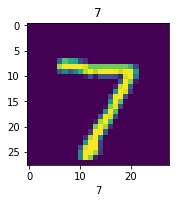

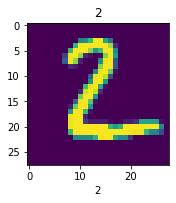

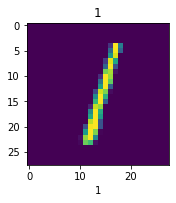

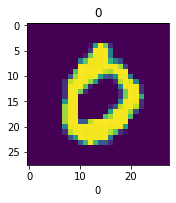

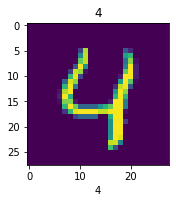

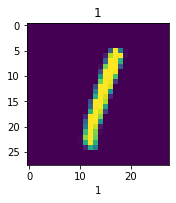

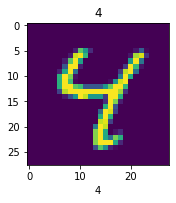

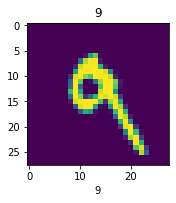

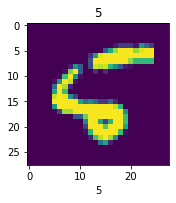

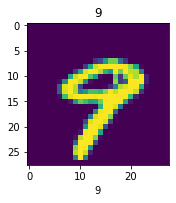

In [17]:
for i in range(0,10):
    plt.figure(figsize=(30,30))
    plt.subplot(1,10,i+1)
    plt.imshow(X_test[i])
    plt.xlabel(Y_pred[i])
    plt.title(y_test[i])

In [18]:
actual=y_test
predicted=Y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


Text(114.0, 0.5, 'Actual')

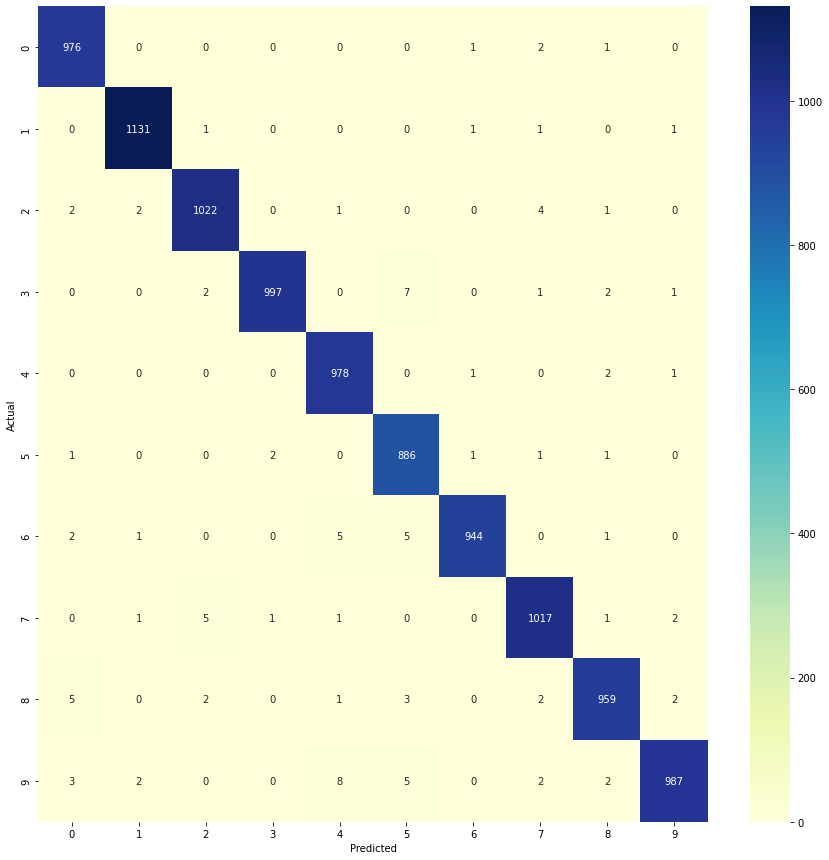

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(cm,cmap="YlGnBu",annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')